# Obtención de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Primero conectamos a google drive para leer la base (igual podemos descargarla y subirla de manera manera manual)

Cargamos la base

In [ ]:
import pandas as pd
datos = pd.read_csv("/content/drive/MyDrive/Aprendizaje/Curso Machine Learning Domestika/U4_04_train.csv")

# Limpieza

Primero vemos cómo se compone la base de datos

In [ ]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Las variables que consideramos descartar debido a que su información es irrelevante y perjudicaría al modelo son:

*   PassengerId
*   Name
*   Ticket
*   Cabin

NOTA: Es importante conocer la descripción de cada variable y los metadatos correspondientes (información de cada variable) para ayudarnos a decidir sobre su importancia para el modelo

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Consta de 891 filas y 12 columnas.

Las variables que no son numéricas son:
* Name
* Sex
* Ticket
* Cabin
* Embarked



Nos interesa saber cómo se componen las variables categóricas:

In [ ]:
datos["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
datos["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

La variable Pclass está como numérica pero tal vez sea más conveniente clasificarla como categórica ya que representa las diferentes clases que había en el barco

In [ ]:
datos["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Verificaremos los datos faltantes en todas las columnas

In [ ]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Las columnas con datos faltantes son Age, Cabin y Embarked

La función **describe** nos dará indicadores estadísticos para las variables numéricas

In [ ]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observamos que:

*   Hay diferencias en los rangos de cada variable por lo que estandarizar la información podría ser necesario para mejorar nuestro modelo
*   Puede que haya datos atípicos (outliers) en las columnas Age y Fare, podemos apoyarnos de una gráfica para ello


In [ ]:
import seaborn as sb

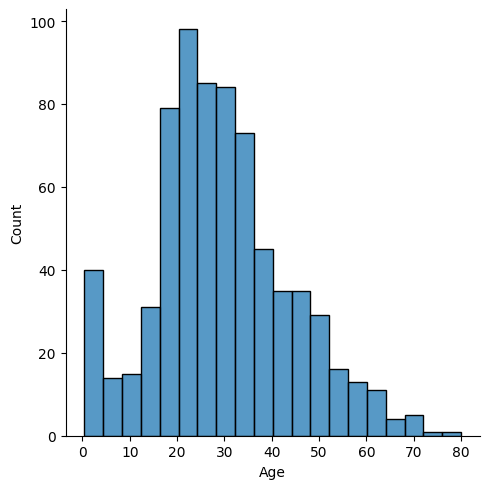

In [ ]:
sb.displot(x="Age", data=datos)

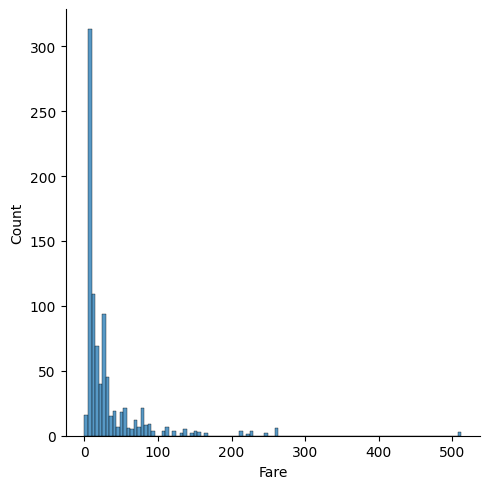

In [ ]:
sb.displot(x="Fare", data=datos)

En la variable Age hay valores en 80 que sí podríamos considerar outliers ya que se alejan de la media varias veces la desviación estándar.

En donde es más notable es en la variable Fare que tiene datos por encima de los 500

Del análisis anterior notamos que son varias cosas que tenemos que hacer:


*   Eliminar las columnas que no vamos a utilizar
*   Tratar los datos faltantes
*   Tratar los outliers



Empezamos eliminando las columnas:


*   PassengerId
*   Name
*   Ticket
*   Cabin

In [ ]:
datos = datos.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

Para tratar los datos faltantes de la columna Age tenemos diferentes alternativas, entre las principales son:


*   Completar el dato con algún valor como el promedio de la variable o con un cero
*   Eliminar los registros

Optaremos por la primera opción para no perder información



In [ ]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


En el caso de los outliers estos no podemos saber si son un error en los datos pero para ser más conservador, eliminaremos todos los registros que estén alejados más de 3 desviaciones estándar de la media.

Lo aplicaremos en la variable Age y en la variable Fare.

In [ ]:
datos["Age"].mean()

29.69911764705882

In [ ]:
datos["Age"].std()

13.002015226002882

In [ ]:
datos["Fare"].mean()

32.204207968574636

In [ ]:
datos["Fare"].std()

49.6934285971809

In [ ]:
umbral_age = datos["Age"].mean() + 3*datos["Age"].std()
umbral_age

68.70516332506747

In [ ]:
umbral_fare = datos["Fare"].mean() + 3*datos["Fare"].std()
umbral_fare

181.2844937601173

In [ ]:
datos[datos["Age"] >= umbral_age]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
493,0,1,male,71.0,0,0,49.5042,C
630,1,1,male,80.0,0,0,30.0000,S
672,0,2,male,70.0,0,0,10.5000,S
745,0,1,male,70.0,1,1,71.0000,S
851,0,3,male,74.0,0,0,7.7750,S


In [ ]:
datos[datos["Fare"] >= umbral_fare]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
27,0,1,male,19.000000,3,2,263.0000,S
88,1,1,female,23.000000,3,2,263.0000,S
118,0,1,male,24.000000,0,1,247.5208,C
258,1,1,female,35.000000,0,0,512.3292,C
299,1,1,female,50.000000,0,1,247.5208,C
311,1,1,female,18.000000,2,2,262.3750,C
341,1,1,female,24.000000,3,2,263.0000,S
377,0,1,male,27.000000,0,2,211.5000,C
380,1,1,female,42.000000,0,0,227.5250,C
438,0,1,male,64.000000,1,4,263.0000,S


In [ ]:
datos = datos[datos["Age"] < umbral_age]

In [ ]:
datos = datos[datos["Fare"] < umbral_fare]

In [ ]:
datos.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,0.378472,2.343750,29.322935,0.520833,0.368056,26.500689
std,0.485287,0.819028,12.490450,1.104937,0.794651,29.400192
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,13.860400
75%,1.000000,3.000000,35.000000,1.000000,0.000000,29.775000
max,1.000000,3.000000,66.000000,8.000000,6.000000,164.866700


# Transformación

In [ ]:
datos.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Lo primero que haremos es crear variables dummies para Pclass, Sex y Embarked

In [ ]:
dummies_pclass = pd.get_dummies(datos["Pclass"], drop_first=True)

In [ ]:
dummies_pclass.columns = ["Pclass2", "Pclass3"]

In [ ]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)

In [ ]:
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True)

In [ ]:
datos = datos.join(dummies_sex)
datos = datos.join(dummies_pclass)
datos = datos.join(dummies_embarked)

In [ ]:
datos = datos.drop(["Sex", "Pclass", "Embarked"], axis=1)

# Análisis Exploratorio

Trataremos de averiguar cuáles datos serán los más convenientes a usar en nuestro modelo, es decir, cuáles se relacionan y explican mejor a nuestra variable de interés "Survived"

In [ ]:
datos.describe()

,Survived,Age,SibSp,Parch,Fare,male,Pclass2,Pclass3,Q,S
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,0.378472,29.322935,0.520833,0.368056,26.500689,0.650463,0.211806,0.565972,0.087963,0.731481
std,0.485287,12.490450,1.104937,0.794651,29.400192,0.477100,0.408824,0.495916,0.283405,0.443446
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,13.860400,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,29.775000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,66.000000,8.000000,6.000000,164.866700,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

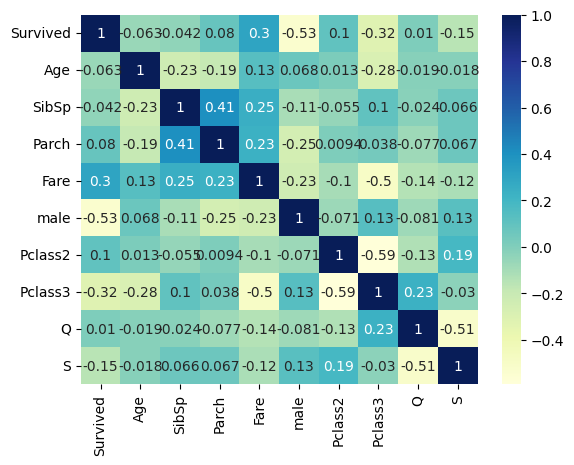

In [ ]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

Recordemos que el gráfico anterior cálcula el coeficiente de correlación entre cada variable, todos contra todos. Nos ayuda a identificar la relación lineal que existe entre las diferentes variables.

Hay que resaltar que el coeficiente es útil en la regresión lineal pero en este caso utilizaremos la regresión logística dado que se trata de un problema de clasificación, por lo que no nos guiaremos de dichos números para escoger a las variables.

Para fines prácticos, usaremos todas las variables en nuestro modelo.

# Modelo

Datos de prueba y entrenamiento

In [ ]:
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

(Opcional) Estandarizar la información

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_ent_esc = scaler.fit_transform(X_ent)
X_pru_esc = scaler.fit_transform(X_pru)

Modelo de regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_ent, y_ent)

LogisticRegression(max_iter=1000)

In [ ]:
predicciones = modelo.predict(X_pru)

(Opcional) Cambiar el threshold

In [ ]:
# Nota: En el código anterior se considera un threshold de 0.5, es decir, el modelo arroja probabilidad y la función predict lo que hace es
# Asignar el valor a la etiqueta que tenga un valor superior a 0.5
# Este valor de 0.5 no tiene que ser el que utilicemos, en ocasiones vamos a querer cambiar la sensibilidad del modelo a
# Falsos Negativos y Falsos Positivos
# Por lo que, en caso de querer cambiar el threshold podemos usar la siguiente función

# modelo.predict_proba(X_pru)

# Obtener probabilidades de pertenencia a la clase positiva
probs = modelo.predict_proba(X_pru)[:, 1]

# Escogemos un umbral
umbral = 0.7

# Convertir probabilidades en predicciones binarias usando el umbral
predicciones_2 = (probs > umbral).astype(int)

print(predicciones_2)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.8439306358381503

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       100
           1       0.87      0.74      0.80        73

    accuracy                           0.84       173
   macro avg       0.85      0.83      0.84       173
weighted avg       0.85      0.84      0.84       173



Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

array([[92,  8],
       [19, 54]])

In [ ]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,92,8
Real: Si,19,54
